# Plots for fully matched dataset

In [4]:
import h5py
import awkward as ak
import vector
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep
from matplotlib.colors import LogNorm
hep.style.use(hep.style.ROOT)
mpl.rcParams['figure.dpi'] = 100
vector.register_awkward()

In [7]:
df = h5py.File('./data/0903_output_v5_matched.h5','r')
df_input = h5py.File('./data/tth_matched_2.h5','r')

OSError: Unable to open file (unable to open file: name = 'Users/juliamaidannyk/Downloads/SPANet/0903_output_v5_matched.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [6]:
fields = ['pt','eta','phi','btag']
jets = ak.zip({
    f: df["INPUTS"]["Source"][f][()] for f in fields
}, with_name="Momentum4D")
jets["m"] = np.zeros_like(jets.pt)

NameError: name 'df' is not defined

In [7]:
jets[0].tolist()

[{'pt': 141.5,
  'eta': 1.500244140625,
  'phi': 1.181396484375,
  'btag': 0.006282806396484375,
  'm': 0.0},
 {'pt': 126.0,
  'eta': 2.365234375,
  'phi': -2.8564453125,
  'btag': 0.99609375,
  'm': 0.0},
 {'pt': 123.8125,
  'eta': 1.673828125,
  'phi': 0.4423828125,
  'btag': 0.006175994873046875,
  'm': 0.0},
 {'pt': 102.4375,
  'eta': 1.1171875,
  'phi': -0.8157958984375,
  'btag': 0.99951171875,
  'm': 0.0},
 {'pt': 84.375,
  'eta': 2.15576171875,
  'phi': 1.50146484375,
  'btag': 0.19140625,
  'm': 0.0},
 {'pt': 42.5625,
  'eta': 0.723876953125,
  'phi': 3.0244140625,
  'btag': 0.998046875,
  'm': 0.0},
 {'pt': 0.0, 'eta': 0.0, 'phi': 0.0, 'btag': 0.0, 'm': 0.0}]

## Higgs invariant mass

In [9]:
H_b1_true = ak.Array(df_input["TARGETS"]["h"]["b1"][()])
H_b2_true = ak.Array(df_input["TARGETS"]["h"]["b2"][()])

# Trick to make it a var-formatted array with 1 element per row
H_b1_true = ak.unflatten(H_b1_true, ak.ones_like(H_b1_true))
H_b2_true = ak.unflatten(H_b2_true, ak.ones_like(H_b2_true))

higgs_index_true = ak.concatenate((H_b1_true, H_b2_true), axis=1)
higgs_jet_true = jets[higgs_index_true]

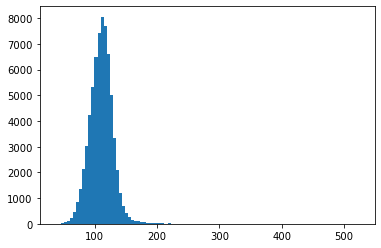

In [10]:
plt.hist((higgs_jet_true[:,0] + higgs_jet_true[:,1]).m, bins=100); # H inv mass hist

In [14]:
higgs_jet_true[1].tolist() # always two jets b1 and b2 

[{'pt': 111.125,
  'eta': -0.703125,
  'phi': 0.4298095703125,
  'btag': 0.71044921875,
  'm': 0.0},
 {'pt': 60.4375,
  'eta': 0.29644775390625,
  'phi': 1.163818359375,
  'btag': 0.9775390625,
  'm': 0.0}]

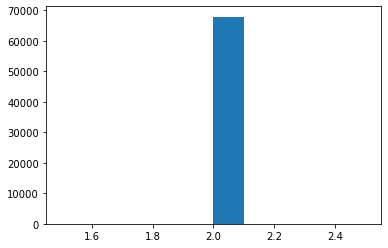

In [18]:
plt.hist(ak.num(higgs_jet_true));

In [19]:
H_b1_pred = ak.Array(df["TARGETS"]["h"]["b1"][()])
H_b2_pred = ak.Array(df["TARGETS"]["h"]["b2"][()])

# Trick to make it a var-formatted array with 1 element per row
H_b1_pred = ak.unflatten(H_b1_pred, ak.ones_like(H_b1_pred))
H_b2_pred = ak.unflatten(H_b2_pred, ak.ones_like(H_b2_pred))

higgs_index_pred = ak.concatenate((H_b1_pred, H_b2_pred), axis=1)
higgs_jet_pred = jets[higgs_index_pred]

In [26]:
print(f"Length of higgs_jet_pred: {len(higgs_jet_pred)}")
print(f"Length of higgs_jet_true: {len(higgs_jet_true)}") # same for fully matched

Length of higgs_jet_pred: 67876
Length of higgs_jet_true: 67876


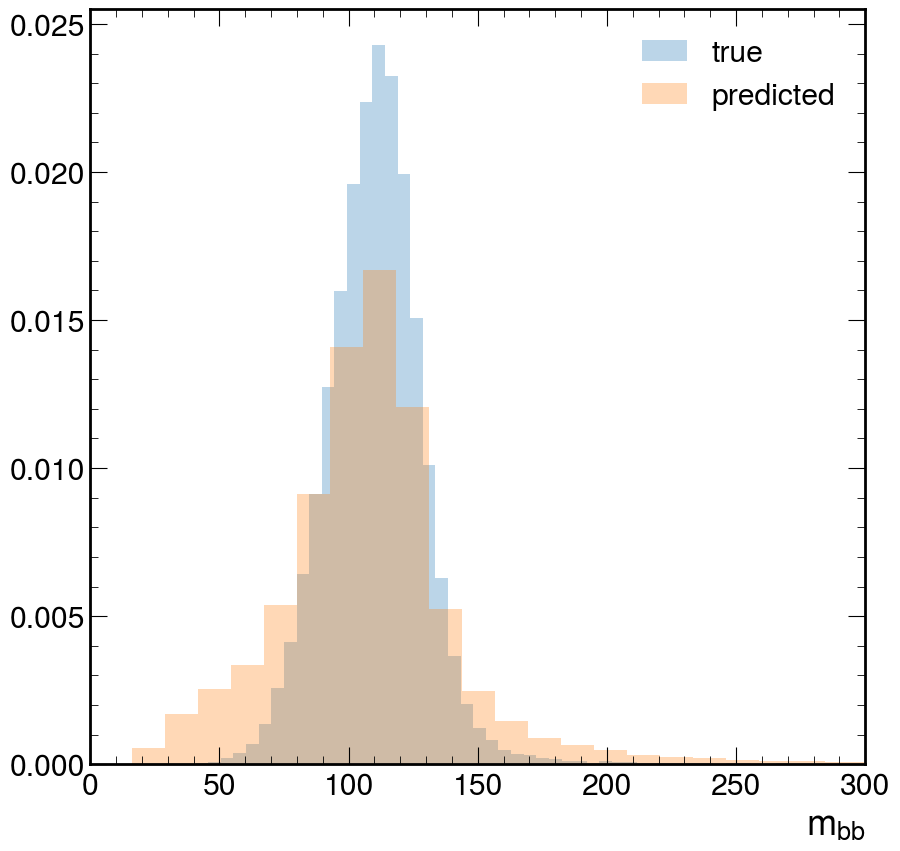

In [87]:
plt.hist((higgs_jet_true[:,0] + higgs_jet_true[:,1]).m, bins=100, 
         density=True, alpha=0.3, label="true")
plt.hist((higgs_jet_pred[:,0] + higgs_jet_pred[:,1]).m, bins=100,
         density=True, alpha=0.3, label="predicted")
plt.xlim(0,300)
plt.xlabel(r"$m_{bb}$")
plt.legend()
plt.show()

## Hadronic top invariant mass

In [50]:
t1_q1_pred = ak.Array(df["TARGETS"]["t1"]["q1"][()])
t1_q2_pred = ak.Array(df["TARGETS"]["t1"]["q2"][()])
t1_b_pred = ak.Array(df["TARGETS"]["t1"]["b"][()])

t1_q1_pred = ak.unflatten(t1_q1_pred, ak.ones_like(t1_q1_pred))
t1_q2_pred = ak.unflatten(t1_q2_pred, ak.ones_like(t1_q2_pred))
t1_b_pred = ak.unflatten(t1_b_pred, ak.ones_like(t1_b_pred))

hadtop_index_pred = ak.concatenate((t1_q1_pred, t1_q2_pred, t1_b_pred), axis=1)
hadtop_jet_pred = jets[hadtop_index_pred]

t1_q1_true = ak.Array(df_input["TARGETS"]["t1"]["q1"][()])
t1_q2_true = ak.Array(df_input["TARGETS"]["t1"]["q2"][()])
t1_b_true = ak.Array(df_input["TARGETS"]["t1"]["b"][()])

t1_q1_true = ak.unflatten(t1_q1_true, ak.ones_like(t1_q1_true))
t1_q2_true = ak.unflatten(t1_q2_true, ak.ones_like(t1_q2_true))
t1_b_true = ak.unflatten(t1_b_true, ak.ones_like(t1_b_true))

hadtop_index_true = ak.concatenate((t1_q1_true, t1_q2_true, t1_b_true), axis=1)
hadtop_jet_true = jets[hadtop_index_true]

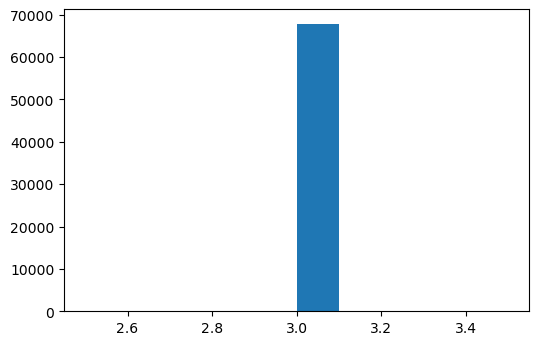

In [52]:
plt.hist(ak.num(hadtop_jet_pred));

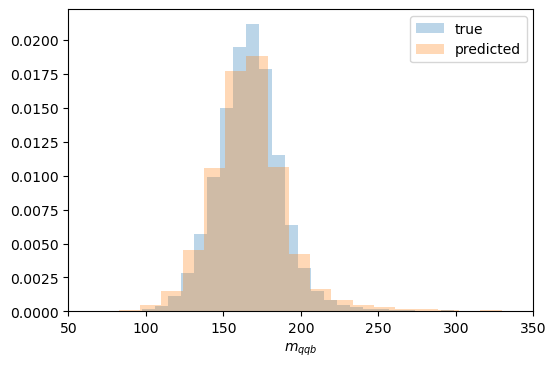

In [55]:
plt.hist((hadtop_jet_true[:,0] + hadtop_jet_true[:,1] + hadtop_jet_true[:,2]).m,
         bins=100, density=True, alpha=0.3, label="true")
plt.hist((hadtop_jet_pred[:,0] + hadtop_jet_pred[:,1] + + hadtop_jet_pred[:,2]).m,
         bins=100, density=True, alpha=0.3, label="predicted")
plt.xlim(50,350)
plt.xlabel(r"$m_{qqb}$")
plt.legend()
plt.show()

## Leptonic top

In [61]:
t2_b_pred = ak.Array(df["TARGETS"]["t2"]["b"][()])
t2_b_pred = ak.unflatten(t2_b_pred, ak.ones_like(t2_b_pred))

leptop_index_pred = t2_b_pred
leptop_jet_pred = jets[leptop_index_pred]

t2_b_true = ak.Array(df_input["TARGETS"]["t2"]["b"][()])
t2_b_true = ak.unflatten(t2_b_true, ak.ones_like(t2_b_true))

leptop_index_true = t2_b_true
leptop_jet_true = jets[leptop_index_true]

In [ ]:
# can't reconstruct an invariant mass for now (no leptonic info in this file)

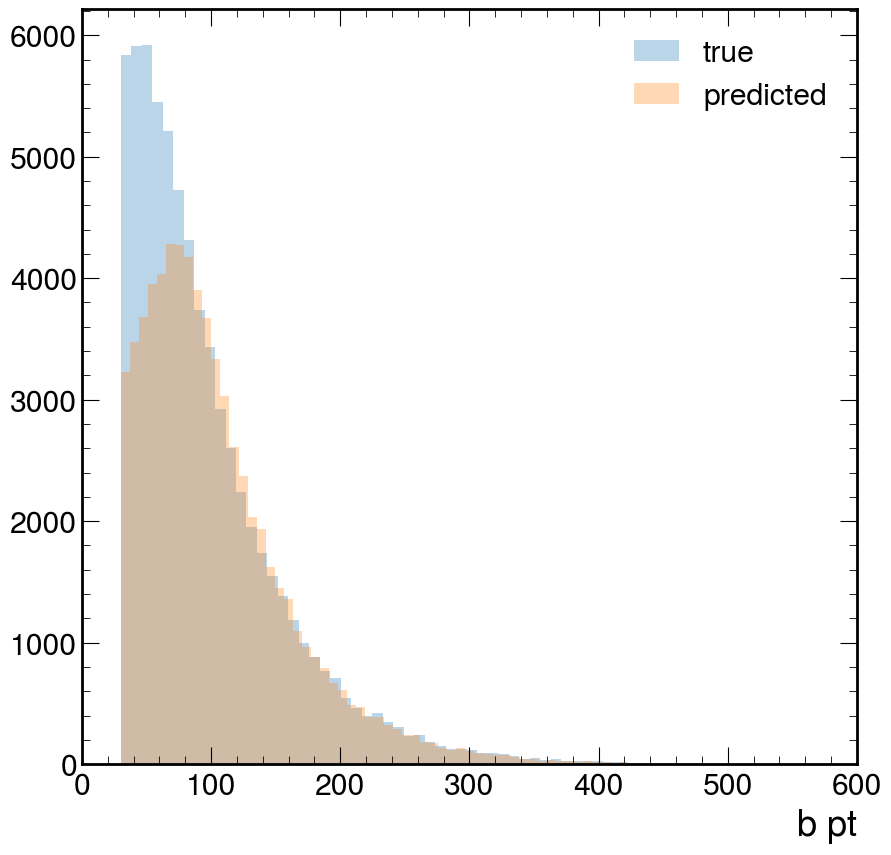

In [129]:
plt.hist(leptop_jet_true[:,0].pt, bins=100, alpha=0.3, label="true")
plt.hist(leptop_jet_pred[:,0].pt, bins=100, alpha=0.3, label="predicted")
plt.xlim(0,600)
plt.xlabel(r"$b$ $pt$")
plt.legend()
plt.show()

## More plots

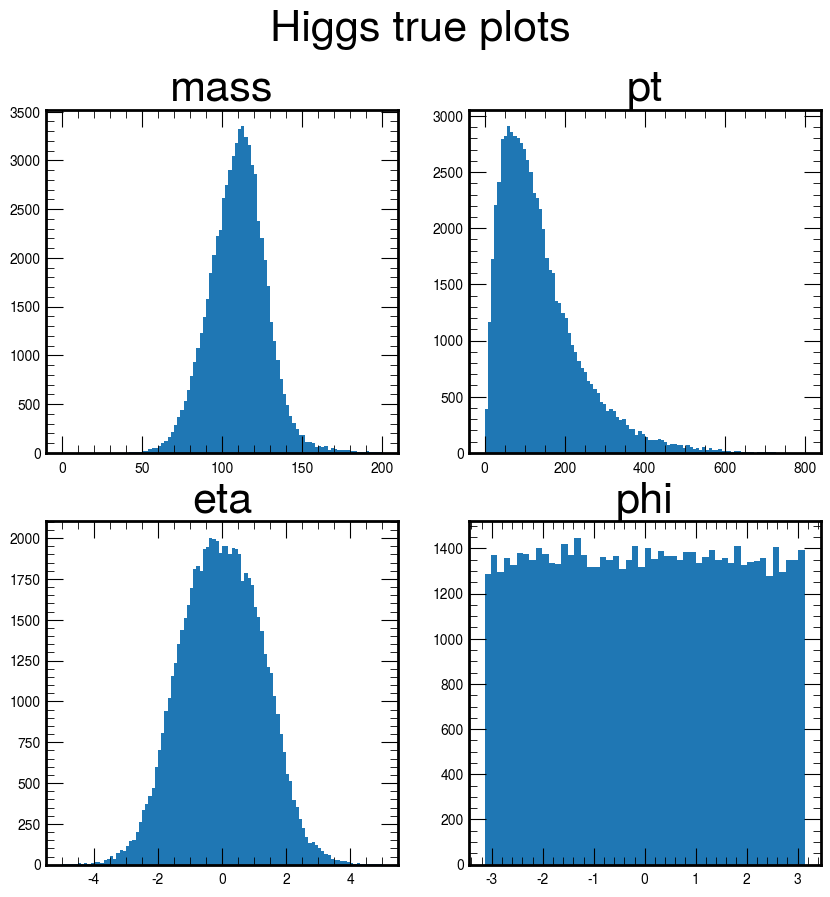

In [122]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist((higgs_jet_true[:,0] + higgs_jet_true[:,1]).m, bins=100, range=(0,200))
axs[0, 0].set_title('mass')
axs[0, 1].hist((higgs_jet_true[:,0] + higgs_jet_true[:,1]).pt, bins=100, range=(0,800))
axs[0, 1].set_title('pt')
axs[1, 0].hist((higgs_jet_true[:,0] + higgs_jet_true[:,1]).eta, bins=100, range=(-5,5))
axs[1, 0].set_title('eta')
axs[1, 1].hist((higgs_jet_true[:,0] + higgs_jet_true[:,1]).phi, bins=50,
               range=(-np.pi,np.pi))
axs[1, 1].set_title('phi')

axs[0,0].tick_params(labelsize=10)
axs[0,1].tick_params(labelsize=10)
axs[1,0].tick_params(labelsize=10)
axs[1,1].tick_params(labelsize=10)

fig.suptitle("Higgs true plots")
plt.show()

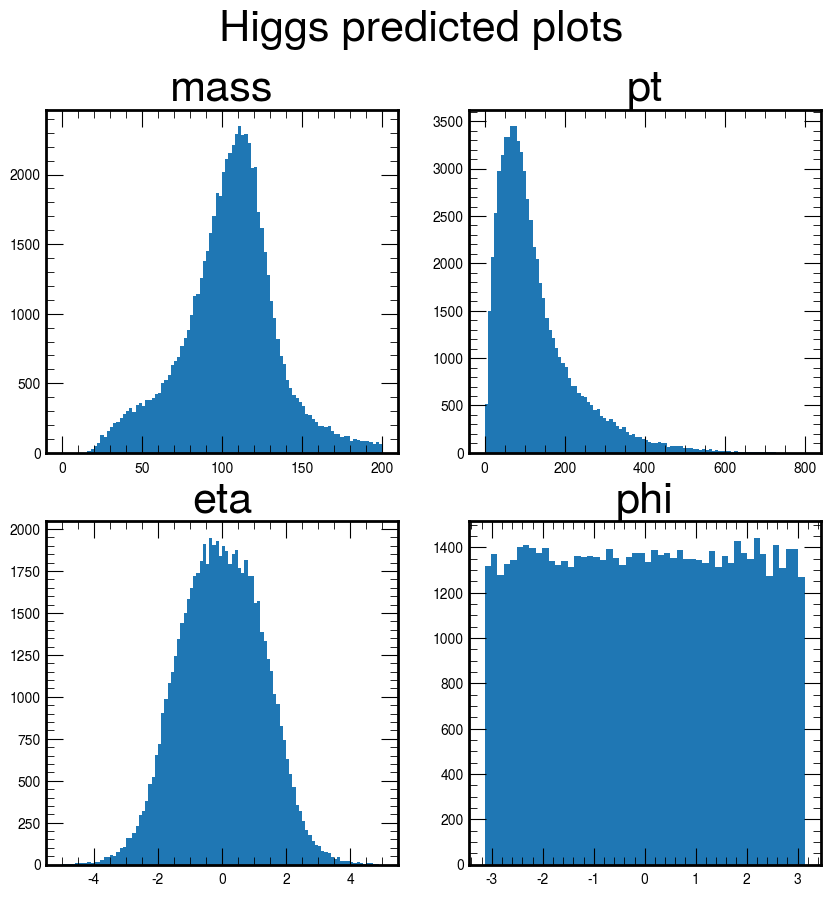

In [96]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist((higgs_jet_pred[:,0] + higgs_jet_pred[:,1]).m, bins=100, range=(0,200))
axs[0, 0].set_title('mass')
axs[0, 1].hist((higgs_jet_pred[:,0] + higgs_jet_pred[:,1]).pt, bins=100, range=(0,800))
axs[0, 1].set_title('pt')
axs[1, 0].hist((higgs_jet_pred[:,0] + higgs_jet_pred[:,1]).eta, bins=100, range=(-5,5))
axs[1, 0].set_title('eta')
axs[1, 1].hist((higgs_jet_pred[:,0] + higgs_jet_pred[:,1]).phi, bins=50,
               range=(-np.pi,np.pi))
axs[1, 1].set_title('phi')

axs[0,0].tick_params(labelsize=10)
axs[0,1].tick_params(labelsize=10)
axs[1,0].tick_params(labelsize=10)
axs[1,1].tick_params(labelsize=10)

fig.suptitle("Higgs predicted plots")
plt.show()

In [118]:
def plot_m_pt_eta_phi(data, title=None):
    fig, axs = plt.subplots(2, 2)
    
    if len(data[0]) == 3: # hadronic top
        axs[0,0].hist((data[:,0] + data[:,1] + data[:,2]).m, bins=100, range=(0,300))
        axs[0,1].hist((data[:,0] + data[:,1] + data[:,2]).pt, bins=100, range=(0,800))
        axs[1,0].hist((data[:,0] + data[:,1] + data[:,2]).eta, bins=100, range=(-5,5))
        axs[1,1].hist((data[:,0] + data[:,1] + data[:,2]).phi, bins=50,
                       range=(-np.pi,np.pi))
    
    if len(data[0]) == 2: # Higgs
        axs[0,0].hist((data[:,0] + data[:,1]).m, bins=100, range=(0,200))
        axs[0,1].hist((data[:,0] + data[:,1]).pt, bins=100, range=(0,800))
        axs[1,0].hist((data[:,0] + data[:,1]).eta, bins=100, range=(-5,5))
        axs[1,1].hist((data[:,0] + data[:,1]).phi, bins=50, range=(-np.pi,np.pi))
        
    if len(data[0]) == 1: # leptonic top
        axs[0,1].hist((data[:,0]).pt, bins=100, range=(0,800))
        axs[1,0].hist((data[:,0]).eta, bins=100, range=(-5,5))
        axs[1,1].hist((data[:,0]).phi, bins=50, range=(-np.pi,np.pi))
        
    axs[0,0].set_title('mass')
    axs[0,1].set_title('pt')
    axs[1,0].set_title('eta')
    axs[1,1].set_title('phi')
    axs[0,0].tick_params(labelsize=10)
    axs[0,1].tick_params(labelsize=10)
    axs[1,0].tick_params(labelsize=10)
    axs[1,1].tick_params(labelsize=10)

    if title != None:
        fig.suptitle(title)
    plt.show()

In [116]:
def compare_m_pt_eta_phi(data, fig=None, axs=None, title=None):
    
    if fig == None and axs == None:
        fig, axs = plt.subplots(2, 2)
    
    if len(data[0]) == 3: # hadronic top
        axs[0,0].hist((data[:,0] + data[:,1] + data[:,2]).m, bins=100, range=(0,300),
                     histtype="step")
        axs[0,1].hist((data[:,0] + data[:,1] + data[:,2]).pt, bins=100, range=(0,800),
                     histtype="step")
        axs[1,0].hist((data[:,0] + data[:,1] + data[:,2]).eta, bins=100, range=(-5,5),
                     histtype="step")
        axs[1,1].hist((data[:,0] + data[:,1] + data[:,2]).phi, bins=50,
                       range=(-np.pi,np.pi), histtype="step")
    
    if len(data[0]) == 2: # Higgs
        axs[0,0].hist((data[:,0] + data[:,1]).m, bins=100, range=(0,200),
                     histtype="step")
        axs[0,1].hist((data[:,0] + data[:,1]).pt, bins=100, range=(0,800),
                     histtype="step")
        axs[1,0].hist((data[:,0] + data[:,1]).eta, bins=100, range=(-5,5),
                     histtype="step")
        axs[1,1].hist((data[:,0] + data[:,1]).phi, bins=50, range=(-np.pi,np.pi),
                     histtype="step")
        
    if len(data[0]) == 1: # leptonic top
        axs[0,1].hist((data[:,0]).pt, bins=100, range=(0,800), histtype="step")
        axs[1,0].hist((data[:,0]).eta, bins=100, range=(-5,5), histtype="step")
        axs[1,1].hist((data[:,0]).phi, bins=50, range=(-np.pi,np.pi), histtype="step")
        
    axs[0,0].set_title('mass')
    axs[0,1].set_title('pt')
    axs[1,0].set_title('eta')
    axs[1,1].set_title('phi')
    axs[0,0].tick_params(labelsize=10)
    axs[0,1].tick_params(labelsize=10)
    axs[1,0].tick_params(labelsize=10)
    axs[1,1].tick_params(labelsize=10)

    if title != None:
        fig.suptitle(title)
    
    return fig,axs

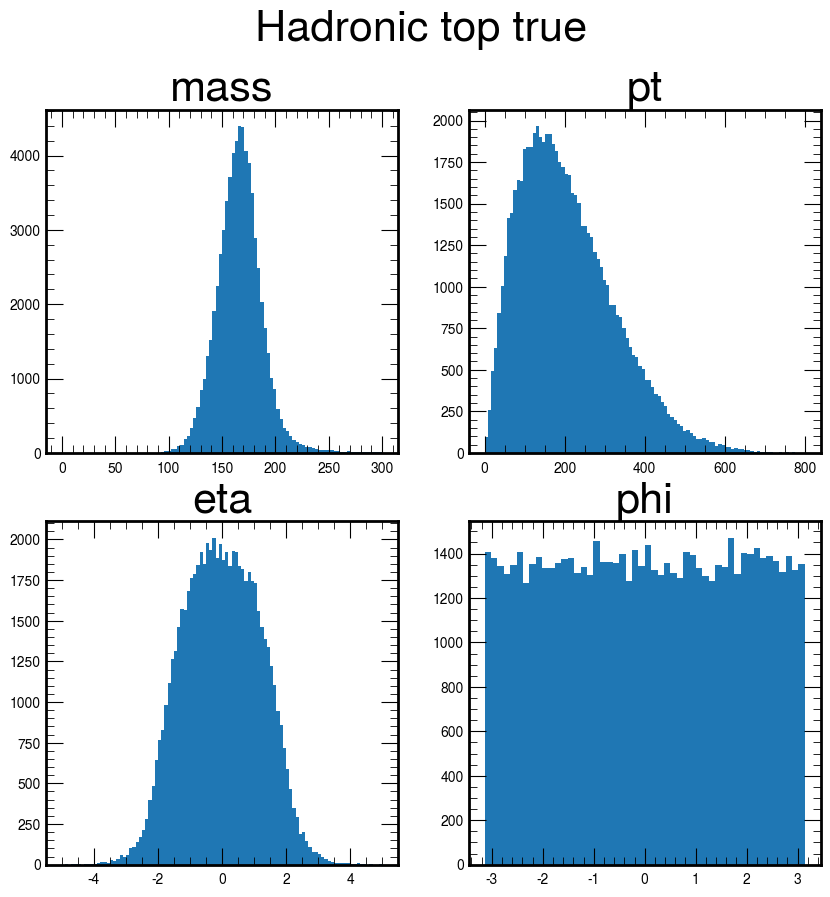

In [102]:
plot_m_pt_eta_phi(hadtop_jet_true, "Hadronic top true")

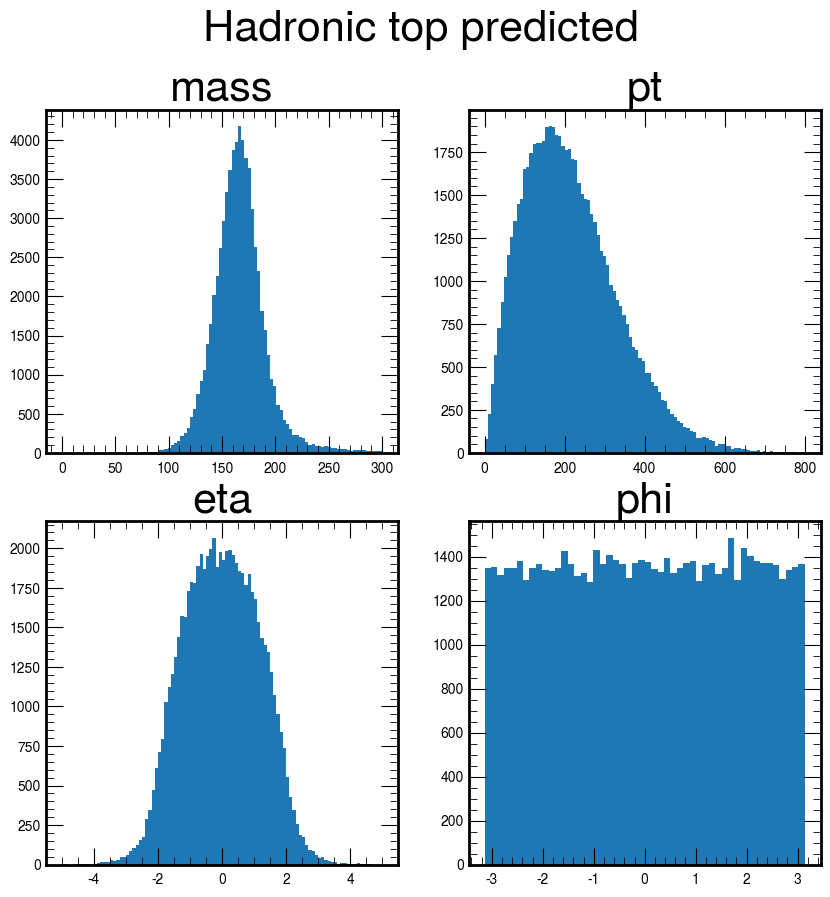

In [103]:
plot_m_pt_eta_phi(hadtop_jet_pred, "Hadronic top predicted")

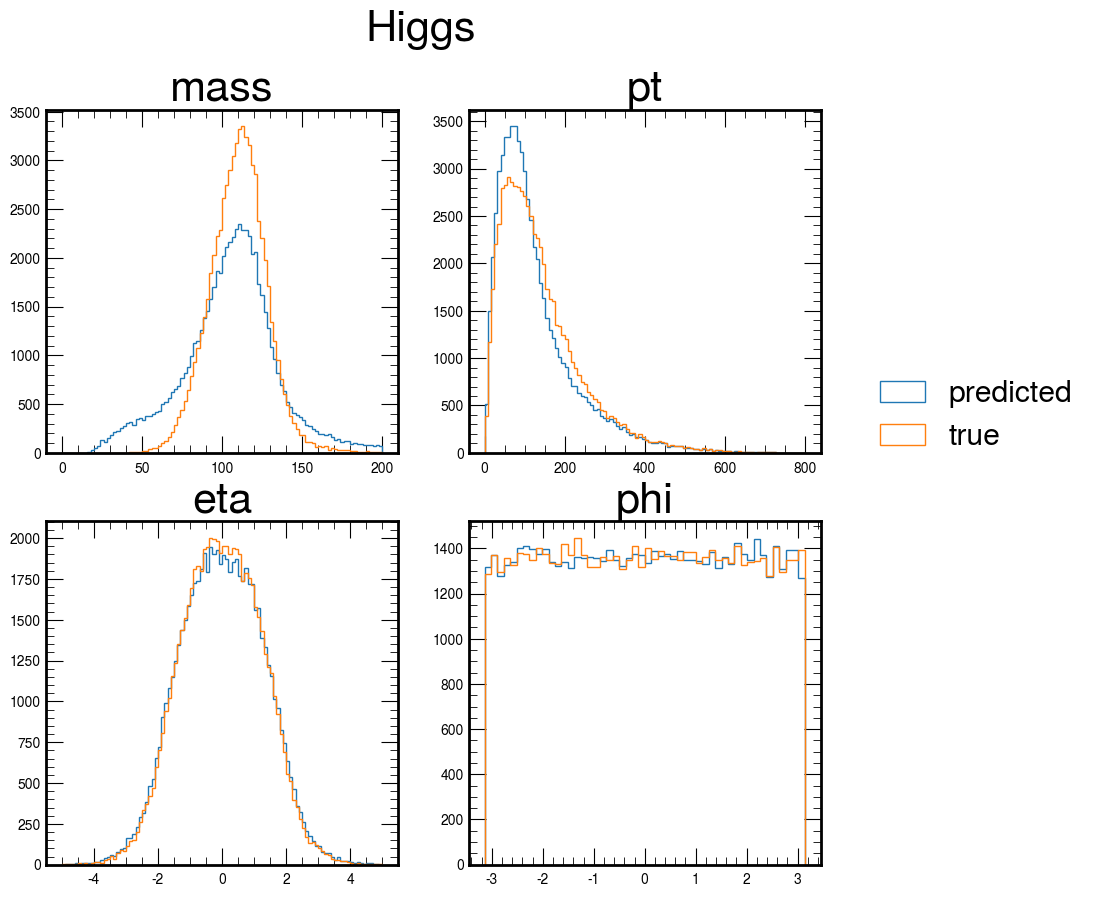

In [123]:
fig,axs = compare_m_pt_eta_phi(higgs_jet_pred, title="Higgs")
compare_m_pt_eta_phi(higgs_jet_true, fig, axs)
labels = ["predicted", "true"]
plt.legend(labels, bbox_to_anchor=(1.8, 1.5))
plt.show()

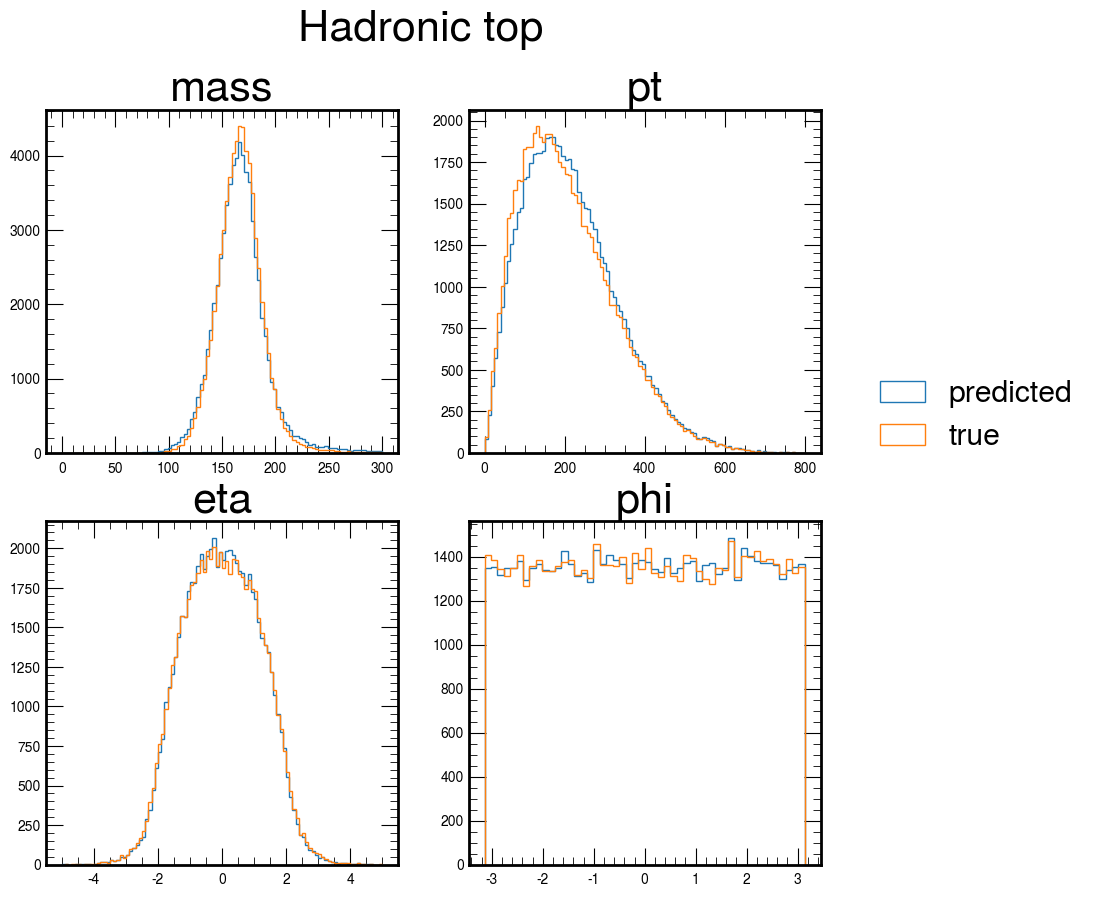

In [124]:
fig,axs = compare_m_pt_eta_phi(hadtop_jet_pred, title="Hadronic top")
compare_m_pt_eta_phi(hadtop_jet_true, fig, axs)
labels = ["predicted", "true"]
plt.legend(labels, bbox_to_anchor=(1.8, 1.5))
plt.show()

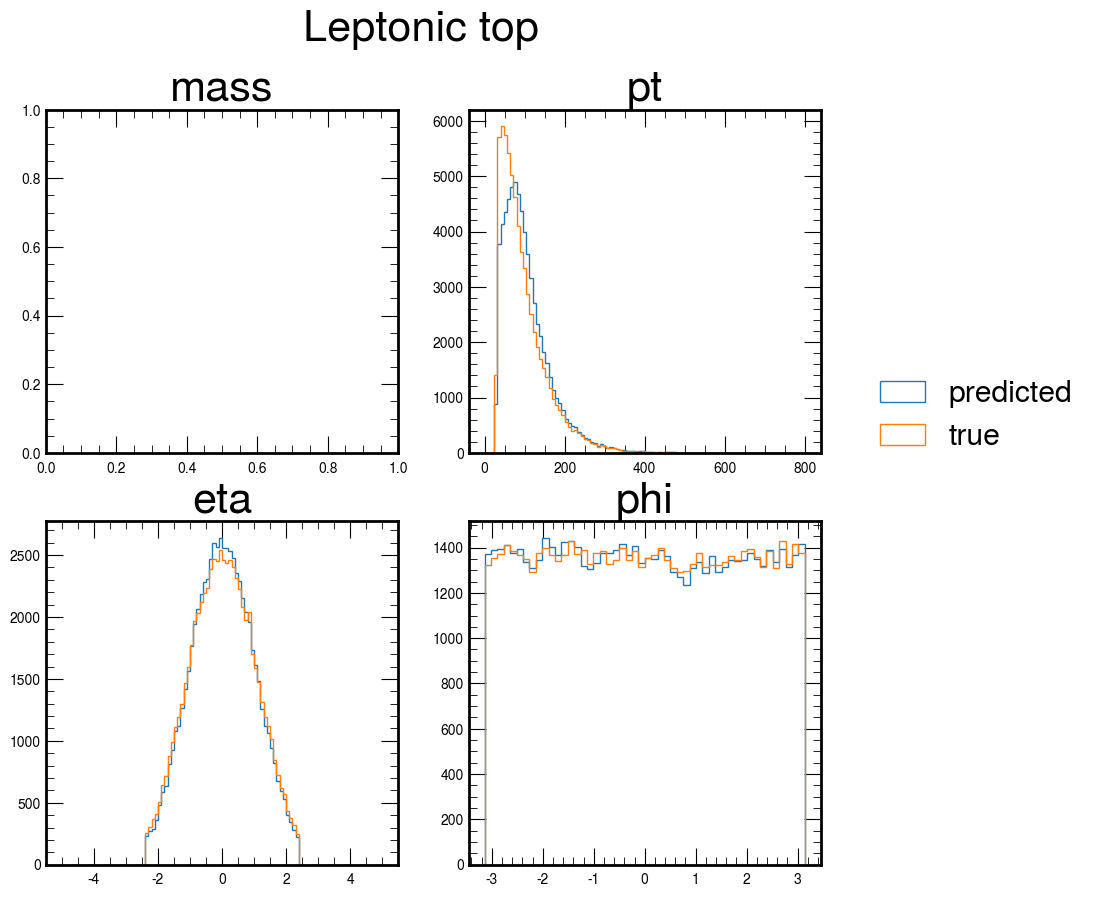

In [125]:
fig,axs = compare_m_pt_eta_phi(leptop_jet_pred, title="Leptonic top")
compare_m_pt_eta_phi(leptop_jet_true, fig, axs)
labels = ["predicted", "true"]
plt.legend(labels, bbox_to_anchor=(1.8, 1.5))
plt.show()

# btag plots

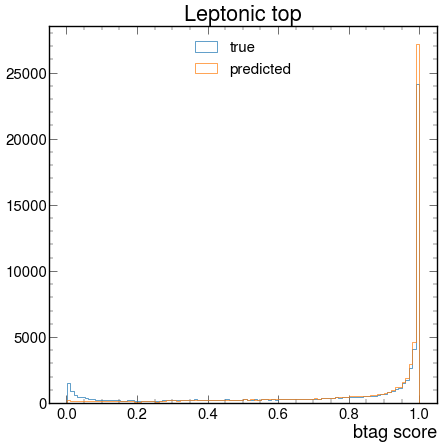

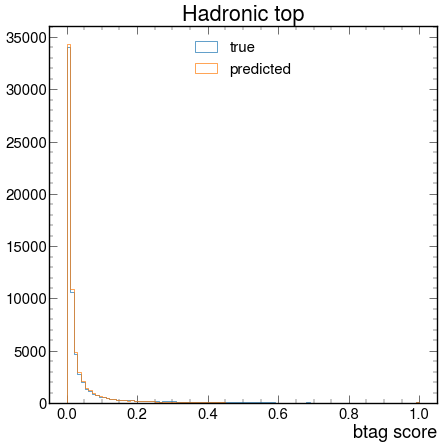

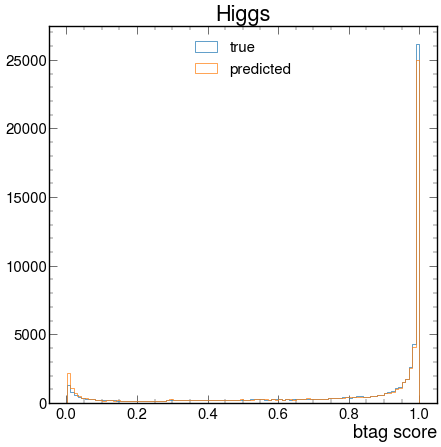

In [135]:
mpl.rcParams['figure.dpi'] = 50

plt.hist(leptop_jet_true[:,0].btag, bins=100, histtype="step", label="true")
plt.hist(leptop_jet_pred[:,0].btag, bins=100, histtype="step", label="predicted")
plt.xlabel("btag score")
plt.legend(loc="upper center")
plt.title("Leptonic top")
plt.show()

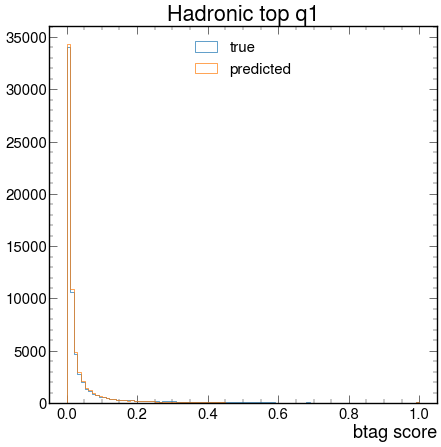

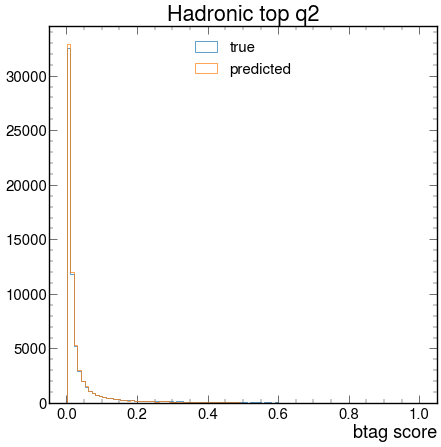

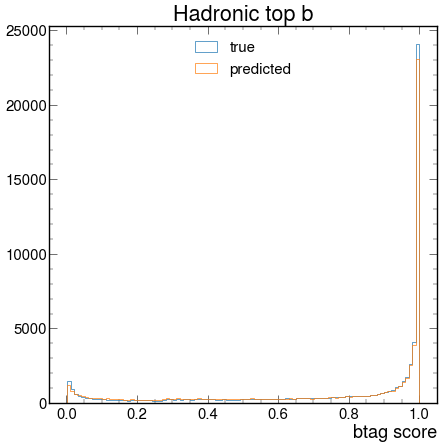

In [137]:
plt.hist(hadtop_jet_true[:,0].btag, bins=100, histtype="step", label="true")
plt.hist(hadtop_jet_pred[:,0].btag, bins=100, histtype="step", label="predicted")
plt.xlabel("btag score")
plt.legend(loc="upper center")
plt.title("Hadronic top q1")
plt.show()

plt.hist(hadtop_jet_true[:,1].btag, bins=100, histtype="step", label="true")
plt.hist(hadtop_jet_pred[:,1].btag, bins=100, histtype="step", label="predicted")
plt.xlabel("btag score")
plt.legend(loc="upper center")
plt.title("Hadronic top q2")
plt.show()

plt.hist(hadtop_jet_true[:,2].btag, bins=100, histtype="step", label="true")
plt.hist(hadtop_jet_pred[:,2].btag, bins=100, histtype="step", label="predicted")
plt.xlabel("btag score")
plt.legend(loc="upper center")
plt.title("Hadronic top b")
plt.show()

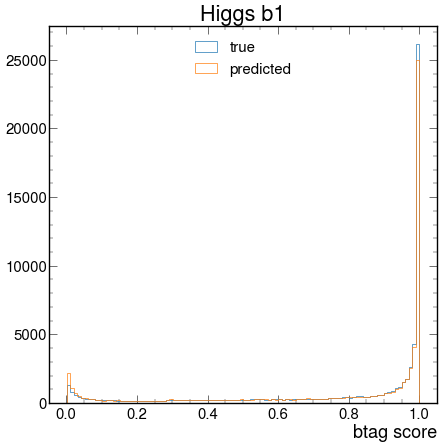

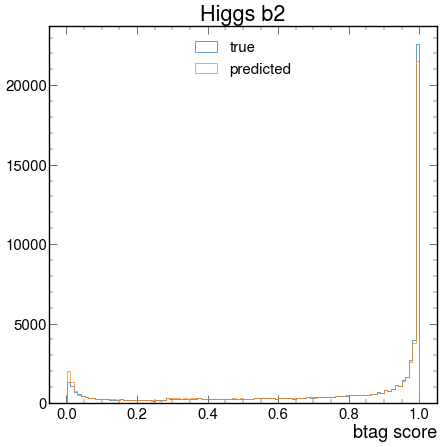

In [138]:
plt.hist(higgs_jet_true[:,0].btag, bins=100, histtype="step", label="true")
plt.hist(higgs_jet_pred[:,0].btag, bins=100, histtype="step", label="predicted")
plt.xlabel("btag score")
plt.legend(loc="upper center")
plt.title("Higgs b1")
plt.show()

plt.hist(higgs_jet_true[:,1].btag, bins=100, histtype="step", label="true")
plt.hist(higgs_jet_pred[:,1].btag, bins=100, histtype="step", label="predicted")
plt.xlabel("btag score")
plt.legend(loc="upper center")
plt.title("Higgs b2")
plt.show()

# 2D Histograms of correlations

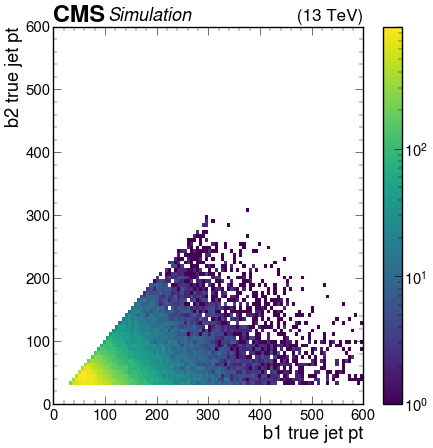

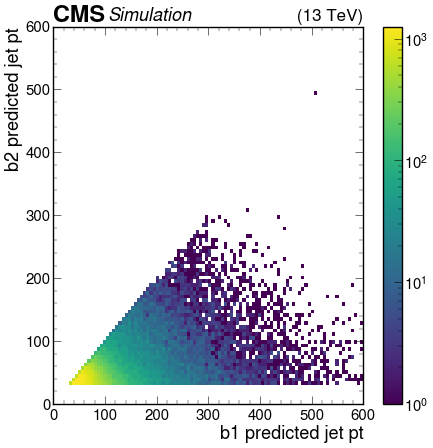

In [148]:
mpl.rcParams['figure.dpi'] = 50

first_pt = higgs_jet_true[0:,0].pt
second_pt = higgs_jet_true[0:,1].pt
plt.hist2d(first_pt, second_pt, bins=100, range=([[0, 600], [0, 600]]),
          norm=LogNorm())
plt.xlabel("b1 true jet pt")
plt.ylabel("b2 true jet pt")
plt.colorbar()
hep.cms.label()
plt.show()

first_pt = higgs_jet_pred[0:,0].pt
second_pt = higgs_jet_pred[0:,1].pt
plt.hist2d(first_pt, second_pt, bins=100, range=([[0, 600], [0, 600]]),
          norm=LogNorm())
plt.xlabel("b1 predicted jet pt")
plt.ylabel("b2 predicted jet pt")
plt.colorbar()
hep.cms.label()
plt.show()

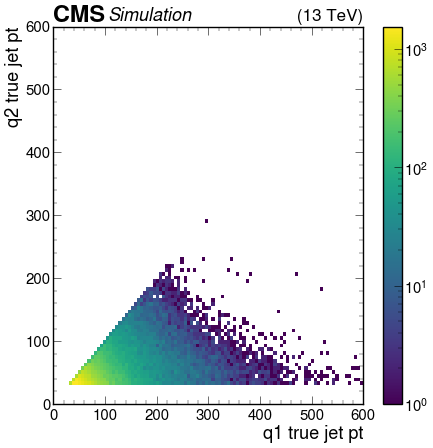

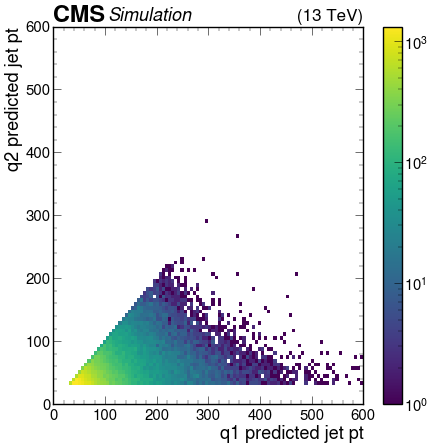

In [150]:
mpl.rcParams['figure.dpi'] = 50

first_pt = hadtop_jet_true[:,0].pt
second_pt = hadtop_jet_true[:,1].pt
plt.hist2d(first_pt, second_pt, bins=100, range=([[0, 600], [0, 600]]),
          norm=LogNorm())
plt.xlabel("q1 true jet pt")
plt.ylabel("q2 true jet pt")
plt.colorbar()
hep.cms.label()
plt.show()

first_pt = hadtop_jet_pred[:,0].pt
second_pt = hadtop_jet_pred[:,1].pt
plt.hist2d(first_pt, second_pt, bins=100, range=([[0, 600], [0, 600]]),
          norm=LogNorm())
plt.xlabel("q1 predicted jet pt")
plt.ylabel("q2 predicted jet pt")
plt.colorbar()
hep.cms.label()
plt.show()

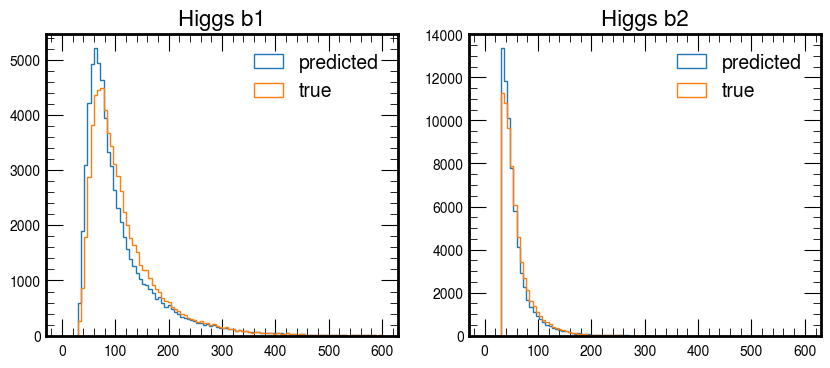

In [179]:
mpl.rcParams['figure.dpi'] = 100

first_true_pt = higgs_jet_true[:,0].pt
second_true_pt = higgs_jet_true[:,1].pt

first_pred_pt = higgs_jet_pred[:,0].pt
second_pred_pt = higgs_jet_pred[:,1].pt

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(first_pred_pt, bins=100, range=(0,600), histtype="step")
axs[0].hist(first_true_pt, bins=100, range=(0,600), histtype="step")
axs[1].hist(second_pred_pt, bins=100, range=(0,600), histtype="step")
axs[1].hist(second_true_pt, bins=100, range=(0,600), histtype="step")

axs[0].set_title('Higgs b1', fontsize=16)
axs[1].set_title('Higgs b2', fontsize=16)
axs[0].legend(labels=["predicted", "true"], fontsize=14)
axs[1].legend(labels=["predicted", "true"], fontsize=14)
axs[0].tick_params(labelsize=10)
axs[1].tick_params(labelsize=10)

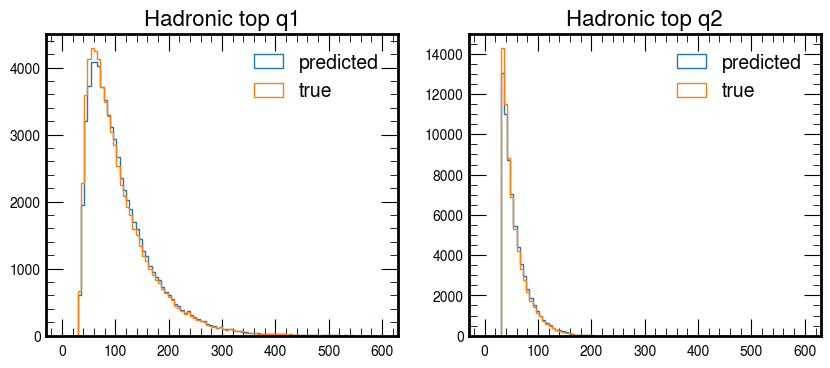

In [188]:
#mpl.rcParams['figure.dpi'] = 100

first_true_pt = hadtop_jet_true[:,0].pt
second_true_pt = hadtop_jet_true[:,1].pt

first_pred_pt = hadtop_jet_pred[:,0].pt
second_pred_pt = hadtop_jet_pred[:,1].pt

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(first_pred_pt, bins=100, range=(0,600), histtype="step")
axs[0].hist(first_true_pt, bins=100, range=(0,600), histtype="step")
axs[1].hist(second_pred_pt, bins=100, range=(0,600), histtype="step")
axs[1].hist(second_true_pt, bins=100, range=(0,600), histtype="step")

axs[0].set_title('Hadronic top q1', fontsize=16)
axs[1].set_title('Hadronic top q2', fontsize=16)
axs[0].legend(labels=["predicted", "true"], fontsize=14)
axs[1].legend(labels=["predicted", "true"], fontsize=14)
axs[0].tick_params(labelsize=10)
axs[1].tick_params(labelsize=10)

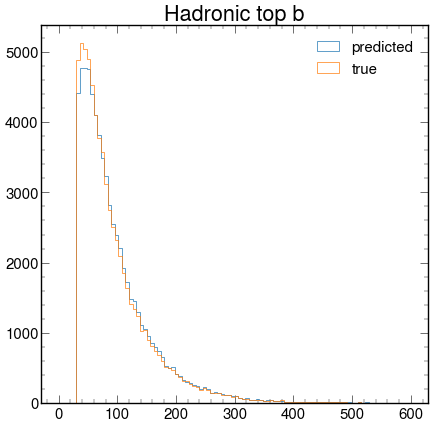

In [193]:
mpl.rcParams['figure.dpi'] = 50
third_pred_pt = hadtop_jet_pred[:,2].pt
third_true_pt = hadtop_jet_true[:,2].pt

plt.hist(third_pred_pt, bins=100, range=(0,600), histtype="step")
plt.hist(third_true_pt, bins=100, range=(0,600), histtype="step")
plt.title('Hadronic top b')
plt.legend(labels=["predicted", "true"])
plt.show()